**INTUITION**  
* How to separate 2 clusters of points.  
* Many lines to split data (decision boundaries) - need to find optimal line.  
* Want to choose line with maximum margin.  
* Maximum margin is the distance between support vectors (closest 2 points with different classifications).  
* Both points are equidistant from center line below - called Maximum Margin Hyperplane (Maximum Margin Classifier).  
* Green dashed: Negative Hyperplane ; Red Dashed: Positive Hyperplane  

![](Intuition.PNG)

* What is appealing about SVM is that it focuses on "fringe" cases.  
* Other algorithms focus on most obvious cases.  

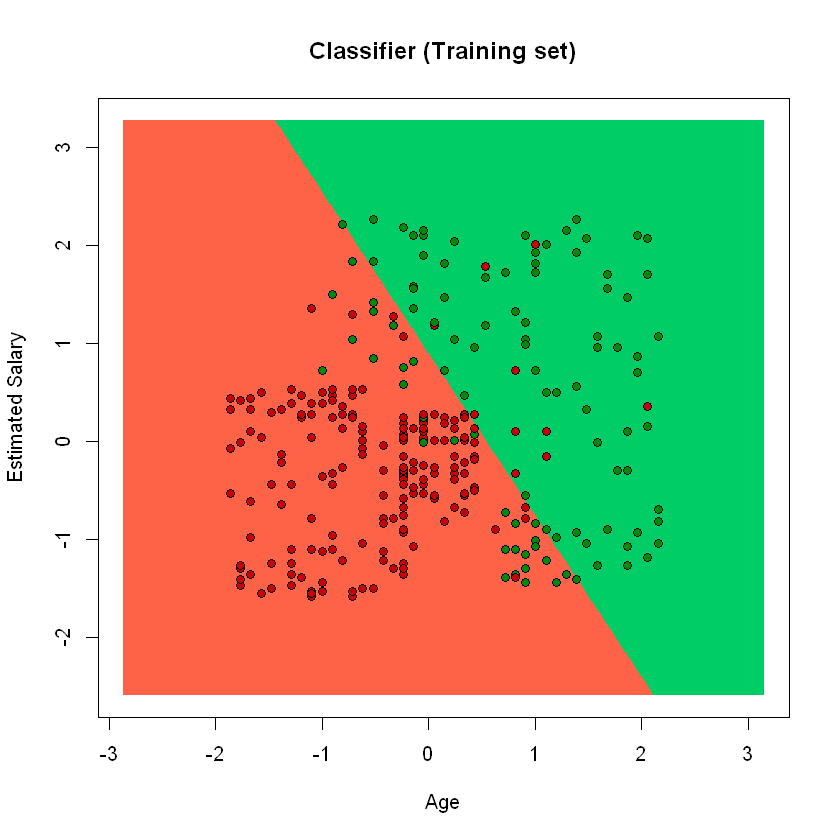

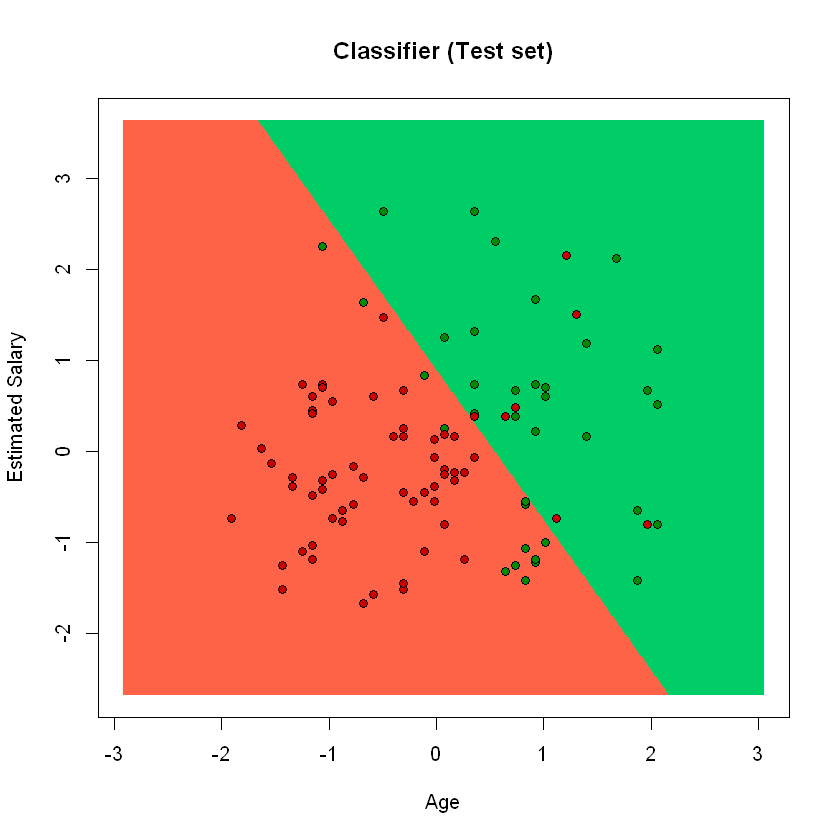

In [2]:
# Classification template

# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

# Fitting classifier to the Training set
library(e1071)
classifier = svm(formula = Purchased ~ .,
                data = training_set, 
                type = 'C-classification',
                kernel = 'linear')

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)

# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Classifier (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'Classifier (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

In [3]:
cm

   y_pred
     0  1
  0 57  7
  1 13 23

**SVM HYPERPARAMETER: TYPE**  
* SVM can be used for classification, regression, or novelty detection.  
* If y is a factor - default is C-classification ; Otherwise default is eps-regression.  
* May overwrite by explicitly choosing from 5 options for this hyperparameter:  
1. C - classification  
2. nu - classification  
3. one - classification (for nonvelty detection)  
4. eps - regression  
5. nu - regression  

**SVM HYPERPARAMETER: KERNEL**  
* Start with simplest option:  Linear  
* Options: linear ; polynomial ; radial basis ; sigmoid